<a href="https://colab.research.google.com/github/incheonQ/AIFFEL_quest_cr/blob/main/DeepLearning/%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])



550378/550378 [==============================] - 0s 0us/step


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 2.8237 - accuracy: 0.4955 - val_loss: 1.9309 - val_accuracy: 0.6000
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.6093 - accuracy: 0.6626 - val_loss: 1.4254 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2168 - accuracy: 0.7422 - val_loss: 1.2395 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9970 - accuracy: 0.7879 - val_loss: 1.1121 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8304 - accuracy: 0.8211 - val_loss: 1.0308 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6949 - accuracy: 0.8508 - val_loss: 0.9684 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5814 - accuracy: 0.8763 - val_loss: 0.9170 - val_accuracy: 0.8160
Epoch 8/20
16

Text(0.5, 0, 'Epochs')

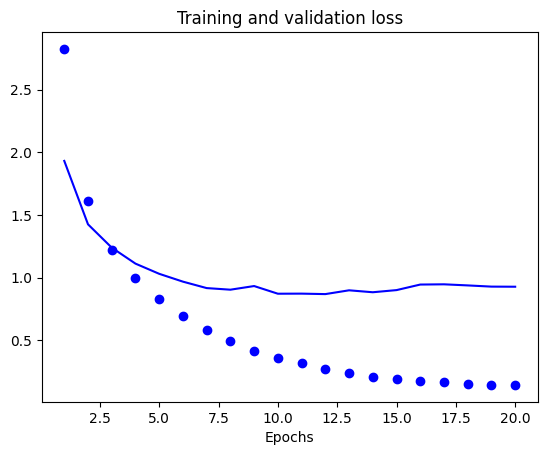

In [6]:
import keras
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')



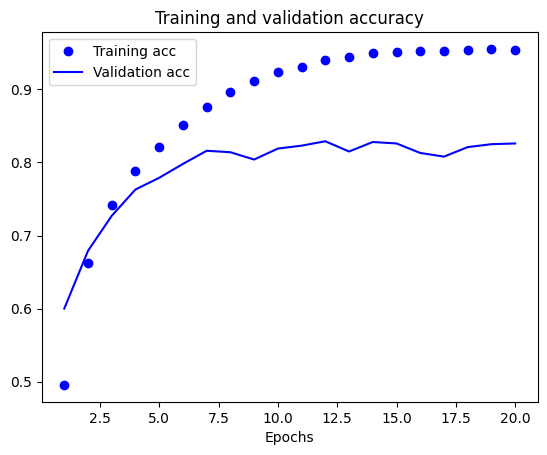

In [7]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 시퀀스 패딩
max_length = 1000  # 시퀀스 길이 증가
x_train = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 검증 세트 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

vocab_size = 10000
embedding_dim = 256  # 임베딩 차원 증가
num_classes = len(np.unique(y_train))

model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.SpatialDropout1D(0.3),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # 'binary_crossentropy' 대신
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
                        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, min_lr=0.00001)
                    ])

Epoch 1/20
113/113 [==============================] - 272s 2s/step - loss: 2.1915 - accuracy: 0.4870 - val_loss: 1.6277 - val_accuracy: 0.5854 - lr: 0.0010
Epoch 2/20
113/113 [==============================] - 264s 2s/step - loss: 1.6149 - accuracy: 0.6231 - val_loss: 1.4798 - val_accuracy: 0.6528 - lr: 0.0010
Epoch 3/20
113/113 [==============================] - 264s 2s/step - loss: 1.3870 - accuracy: 0.6804 - val_loss: 1.4698 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 4/20
113/113 [==============================] - 263s 2s/step - loss: 1.2337 - accuracy: 0.7106 - val_loss: 1.2693 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 5/20
 56/113 [=============>................] - ETA: 2:01 - loss: 1.0732 - accuracy: 0.7411

KeyboardInterrupt: 